---

# Lecture 4.2 Gradient Descent for Training Regression Single Neurons

In this lecture we use the single neuron model and the gradient descent algorithm to solve the **linear regression problem** on single species of flower in the iris dataset. 

## 4.2.1 Linear Regression
Recall that in *regression* machine learning we are given labeled data $\mathcal{D} = \{(\mathbf{x}^1, y^1), \dots, (\mathbf{x}^N, y^N)\}$, where each feature vector satisfies $\mathbf{x}^{(i)} \in \mathbb{R}$ and each label satifies $y^{(i)} \in \mathbb{R}$, and we wish to use the feature vectors to predict the real valued label (or target). 

In **linear regression** we are assuming that *each target value is approximated by a linear function of its associated feature vector*. For example, consider the sepal length as inputs and sepal width as targets for each setosa flower in the iris dataset shown in the plot generated by running the following code in the cell below. 
```python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

df = pd.read_csv("Datasets/iris_dataset.csv")
df = df.iloc[:50][["sepal_length", "sepal_width"]]
plt.figure(figsize = (10, 8))
plt.scatter(df.sepal_length, 
            df.sepal_width, 
            color = "lightseagreen",
            label = "setosa flowers")
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("sepal width [cm]", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()
```

---

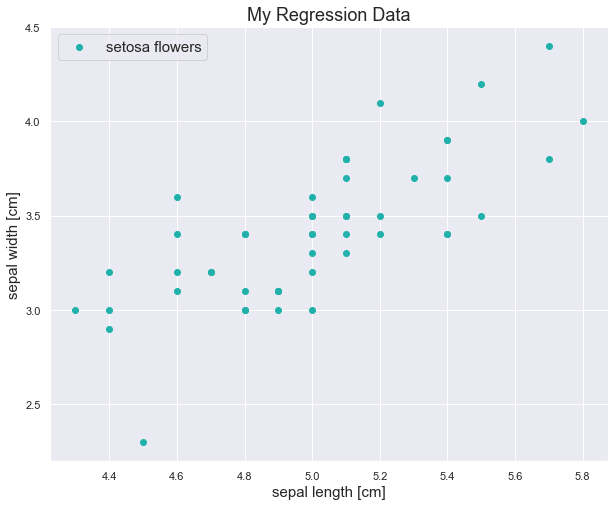

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme()

df = pd.read_csv("Datasets/iris_dataset.csv")
df = df.iloc[:50][["sepal_length", "sepal_width"]]
plt.figure(figsize = (10, 8))
plt.scatter(df.sepal_length, 
            df.sepal_width, 
            color = "lightseagreen",
            label = "setosa flowers")
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("sepal width [cm]", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("My Regression Data", fontsize = 18)
plt.show()

---

## 4.2.2 Linear Regression Single Neuron Model

We can approximate the linear target function $f$ by modeling our problem with a single neuron, where we choose the *linear-activation function* in our model. Note that we will make use of the *mean-sqaured error* cost function shown below. 

The perceptron is a single neuron model with the *sign* activation function as depicted in the figure below.

<p align="center">
    <img src="regression_neuron.png" width="500">
</p>


Before defining a custom ```SingleNeuron``` class, we first need discuss how to use gradient descent to minimize the neurons cost function. More specifically, suppose that we our calculating the cost function for a *single example*, i.e., $N = 1$. For this single example we observe that the cost function is defined by: 
$$
C(w, b; \mathbf{x}^{(i)}, y^{(i)}) = \frac{1}{2}(\hat{y}^{(i)} - y^{(i)})^2. 
$$

In the case of a linear activation function, it is important to note that $\hat{y}^{(i)}$ is a very simple function of both $w_1$ and $b$. More specifically, we observe:

$$
\hat{y}^{(i)} = a = z = w_1x^{(i)} + b. 
$$

Thus, we may rewrite our neuron cost function with a single observation shown by the following equation:

$$
C(w, b; \mathbf{x}^{(i)}, y^{(i)}) = \frac{1}{2}(w_1x^{(i)} + b - y^{(i)})^2. 
$$

With this equation, we can calculate $\partial C/ \partial w_1$ and $\partial C/ \partial b$ easily by applying the [chain rule (click for a quick refresher on the concept)](https://www.youtube.com/watch?v=HaHsqDjWMLU); the resulting partial derivatives with respect to $w_1$ and $b$ shown by the following equations:

1. $\frac{\partial C}{\partial w_1} = (w_1x^{(i)} + b - y^{(i)})x^{(i)} = (\hat{y}^{(i)} - y^{(i)})x^{(i)}$
2. $\frac{\partial C}{\partial b} = (w_1x^{(i)} + b - y^{(i)}) = (\hat{y}^{(i)} - y^{(i)})$

Understanding the different ways in which we may calculate the partial derivatives of our cost function is essential in applying first-order minimization techniques to $C(w_1, b)$. Next we discuss two of the three fundamental methods used to accomplish this goal. 


### Goal: Minimize the Cost Function $C(w_1, b)$
In a previous lecture we learned how the iterative technique called gradient descent can be used to find local minima of differentiable functions. Since our single neuron models cost function is a differentiable function of $w_1$ and $b$, **we can apply this technique to minimize the cost function**, which in-turn will make our neuron better at predicting the correct target label on the data we are observing. 

In the previous single observation example, we easily calculated $\frac{\partial C}{\partial w_1}$ and $\frac{\partial C}{\partial b}$ by applying the chain-rule. With this observation on a single observation, we can easily extend this notion to all data used in training by summing the gradient calculated at entry of data. We will refer to this process as calculating the **full gradient** (or **full partial derivatives**) with respect to the training data: 

1. $\frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial w_1} = \frac{1}{N}\sum_{i=1}^{N}(\hat{y}^{(i)} - y^{(i)})x^{(i)}$
2. $\frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial b} = \frac{1}{N}\sum_{i=1}^{N}(\hat{y}^{(i)} - y^{(i)})$

**Batch Gradient Descent Algorithm:**
1. For each epoch **do**
2. calculate the full gradient by finding $\frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial w_1}$ and $\frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial b}$.
3. $w \leftarrow w - \alpha \frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial w_1}$
4. $b \leftarrow b - \alpha \frac{\partial C(w_1, b; \mathbf{X}, y)}{\partial b}$

Applying batch gradient descent will work, but can be slow and can use a lot of memory when the number of feature vectors is large (possibly millions), and more importantly, is not necessary. The most common way work around this problem is to update $w$ and $b$ by calculating the gradient with respect to one entry of data at a time. 

**Stochastic Gradient Descent Algorithm:**
1. For each epoch **do**
2. for $i = 1, \dots, N$ **do**
3. Calculate $\frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial w_1}$ and $\frac{\partial C(\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)}))}{\partial b}$.
2. $w \leftarrow w - \alpha \frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial w_1}$
3. $b \leftarrow b - \alpha \frac{\partial C(w_1, b; \mathbf{x}^{(i)}, y^{(i)})}{\partial b}$

For single neuron models in practice, stochastic gradient descent should be the preferred way for optimizing the weights and bias by minimizing the cost function. We implement stochastic gradient descent with the ```train``` method used in the following custom ```SingleNeuron``` class. 
```python
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the input linear combination.
        
    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.
        
    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 
        
    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function):
        self.activation_function = activation_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                errors += .5*((self.predict(xi) - target)**2)
            self.errors_.append(errors)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

```

---

---

Now that we have defined our custom ```SingleNeuron``` class we next prep our data for training. By running the following code in the cell below the first two lines convert the setosa sepal length column of data to a numpy vector representation (single entry feature vectors need to be reshaped using the ```reshape(-1, 1)``` method to format the data as a column vector), and the third line converts the setosa sepal width column of data to a ```numpy.ndarray```. 
```python
X = df.sepal_length.values
X = X.reshape(-1, 1)
y = df.sepal_width.values
```

---

---

We can double check that we have the appropriate data by scatter plotting the data again. Run the following code in the cell below. 
```python
plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen")
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("sepal width [cm]")
plt.title("Setosa Regression Data", fontsize = 18)
plt.show()
```

---

---

In order to instantiate a given instance of our ```SingleNeuron``` model, we need to first define an activation function. After doing so we can instantiate a ```SingleNeuron``` object as well as train it by calling the ```train()``` method with input ```X``` and ```y```. Do this by running the following code in the cell below. 
```python
def linear_activation(z):
    return z

node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 5)
```


---

---

Now that we have created an instance of the ```SingleNeuron``` class and called the train method, we can visualize the linear regression line by scatter plotting the data and also ploting the predicted output over some domain within the range of values of input features. Do this by running the following code in the cell below. 
```python
domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)


plt.figure(figsize = (10, 8))
plt.scatter(X, y, color = "lightseagreen")
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("sepal length [cm]", fontsize = 15)
plt.ylabel("sepal width [cm]")
plt.title("Setosa Regression Data", fontsize = 18)
plt.show()
```


---

---

The line generated by our custom ```SingleNeuron``` class surely does not look random! We can verify this by plotting the ```errors_``` attribute that we stored while training, which computed the *mean-sqaured error* on the training dataset after each epoch of applying the stochastic gradient descent algorithm with the ```train()``` method. If the mean sqaured error is decreasing after each epoch we are on the right track, and our single neuron might be learning! 

We can easily visualize the mean-sqaured error at each epoch of our training process by running the following code in the cell below. 
```python
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("MSE", fontsize = 15)
plt.xticks(range(1, len(node.errors_) + 1))
plt.legend(fontsize = 15)
plt.title("MSE Error at Each Epoch During Training", fontsize = 18)
plt.show()

```

---

---

Yes, the MSE is decreasing over each epoch! Lets next try training a single neuron over 10 times more epochs with the same learning rate and see what happens. Try running the following code in the cell below (note the use of the subplots). 
```python
node = SingleNeuron(linear_activation)
node.train(X, y, alpha = .0001, epochs = 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.scatter(X, y, color = "lightseagreen")
ax1.plot(domain, node.predict(domain.reshape(-1, 1)))
ax1.set_xlabel("sepal length [cm]", fontsize = 15)
ax1.set_ylabel("sepal width [cm]")
ax1.set_title("Setosa Regression Data", fontsize = 18)

ax2.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         marker = "o",
         label = "MSE")
ax2.set_xlabel("epochs")
ax2.set_ylabel("MSE")
ax2.set_xticks(range(1, len(node.errors_) + 1, 5))
ax2.legend(fontsize = 10)
ax2.set_title("MSE Error at Each Epoch During Training", fontsize = 18)
```

---

---

## 4.2.3 Experimenting with the Learning Rate 
As discussed in a previous notebook, the choice of learning rate is a crucial *hyperparamter* when implementing gradient (and stochastic gradient) descent. We can view different choices of learning rate with a fixed number of epochs by running the following code in the cell below.
```python
# Possible choices of learning rate 
alphas = [0.01, 0.05, 0.07, 0.09]

domain = np.linspace(np.min(X) - .5, np.max(X) + .5, 100)

# Call the subplots method for plotting a grid of figures
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# Loop over the axs and alpha values
for ax, alpha in zip(axs.flat, alphas):
    node = SingleNeuron(linear_activation)
    node.train(X, y, alpha = alpha, epochs = 55)
    ax.plot(domain, node.predict(domain.reshape(-1, 1)))
    ax.scatter(X, y, color = "lightseagreen")
    ax.set_title(f"alpha = {alpha}", fontsize = 18)
```



---